In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
len(testset)

10000

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


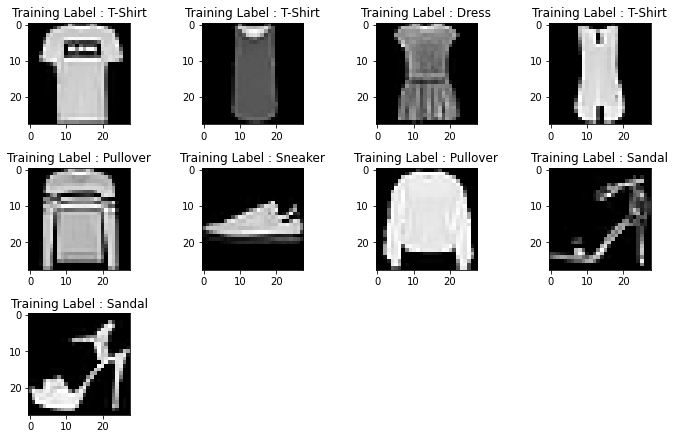

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [256, 128, 64]

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], out_size),
                      nn.LogSoftmax(dim=1)
)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:
        
    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")

Training loss: 0.5403179342844593, Training accuracy: 0.8076833333333333
Training loss: 0.4449947454781929, Training accuracy: 0.8457333333333333
Training loss: 0.41363031078757506, Training accuracy: 0.85795
Training loss: 0.4131920072220282, Training accuracy: 0.8611166666666666
Training loss: 0.3802469412146855, Training accuracy: 0.868
Training loss: 0.36801219793525075, Training accuracy: 0.8735166666666667
Training loss: 0.3598552442975898, Training accuracy: 0.875
Training loss: 0.3711693757759737, Training accuracy: 0.8725333333333334
Training loss: 0.36169609904829375, Training accuracy: 0.8764166666666666
Training loss: 0.3723161057638588, Training accuracy: 0.8752


In [10]:
# funtion from HW2 
def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
      return correct / total

In [ ]:
training_acc = get_accuracy(model,trainset)
test_acc = get_accuracy(model,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.908
accuracy on Testset: 0.878


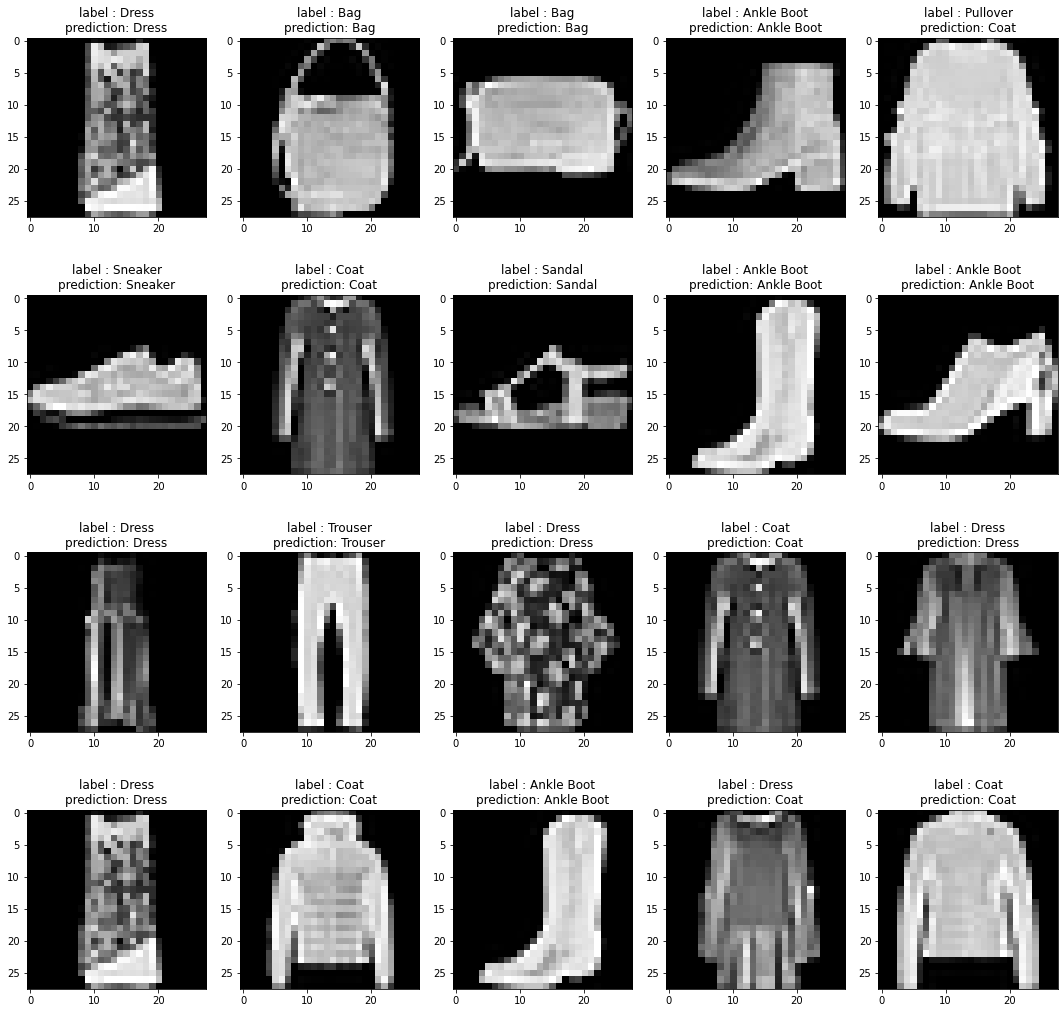

In [ ]:
## Test your model
################ Your code ############
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(15,15));
columns = 5;
rows = 4;

# get a batch from test set
for images,labels in testloader:
    images = images.view(images.shape[0],-1)
    prediction = model(images)
    prediction = prediction.max(1, keepdim=True)[1]
    break

# select and print true lable and predicted label for 20 inctances
for i in range(1, 21):
    idx = random.randint(1,len(images)-1)
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    sample_image = images[idx]
    plt.imshow(sample_image.reshape(28,28).numpy(), cmap='gray')
    plt.title(f"label : {labels_map[labels[idx]]}\nprediction: {labels_map[prediction[idx]]}")
plt.show()
#######################################

## Part b

In [ ]:
input_size = 784
out_size = 10
hidden_sizes = [128, 128, 128, 64]

In [ ]:
model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[3], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(),lr=0.01)

In [ ]:
## Train your model
epochs = 50

train_acc_arr = []
test_acc_arr = []
train_err_arr =[]

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:
        
    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model2(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Epoch:{e}, Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")
    train_acc_arr.append(correct / total)
    tst_acc_tmp = get_accuracy(model2,testset)
    test_acc_arr.append(tst_acc_tmp)
    train_err_arr.append(running_loss/len(trainloader))


Epoch:0, Training loss: 0.5771420112392033, Training accuracy: 0.7955833333333333
Epoch:1, Training loss: 0.46098670471451686, Training accuracy: 0.84285
Epoch:2, Training loss: 0.4658304898501205, Training accuracy: 0.84795
Epoch:3, Training loss: 0.41427385551271156, Training accuracy: 0.8577
Epoch:4, Training loss: 0.4254617472288451, Training accuracy: 0.8572
Epoch:5, Training loss: 0.4039960700089235, Training accuracy: 0.86235
Epoch:6, Training loss: 0.39554701661313774, Training accuracy: 0.8647666666666667
Epoch:7, Training loss: 0.39381734728177725, Training accuracy: 0.8676666666666667
Epoch:8, Training loss: 0.4096396114589817, Training accuracy: 0.8636
Epoch:9, Training loss: 0.43241498990258426, Training accuracy: 0.85375
Epoch:10, Training loss: 0.38118975651639103, Training accuracy: 0.8687666666666667
Epoch:11, Training loss: 0.38076296822030914, Training accuracy: 0.8678833333333333
Epoch:12, Training loss: 0.4164894164434628, Training accuracy: 0.8611
Epoch:13, Traini

In [ ]:
training_acc = get_accuracy(model2,trainset)
test_acc = get_accuracy(model2,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.842
accuracy on Testset: 0.83


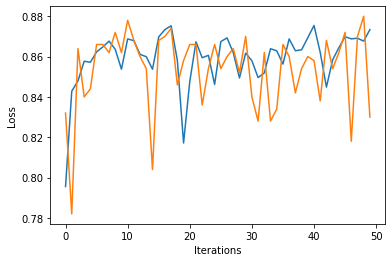

In [ ]:
# plotting
plt.plot(train_acc_arr, label="Train")
plt.plot(test_acc_arr, label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

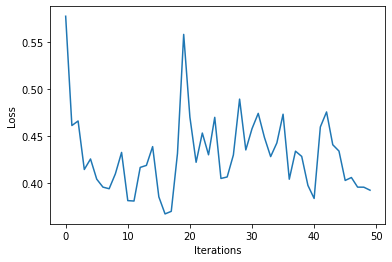

In [ ]:
# plotting
plt.plot(train_err_arr,label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Part c

### Loss: Cross entropy
### Activation: LeakyReLU
### Optimizer: Adam

In [3]:
input_size = 784
out_size = 10
hidden_sizes = [256, 128, 64]

In [4]:
model3 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.LeakyReLU(0.1),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.LeakyReLU(0.1),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.LeakyReLU(0.1),
                       nn.Linear(hidden_sizes[2], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model3)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.1)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.1)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.1)
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(),lr=0.01)

In [8]:
epochs = 10

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:
        
    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model3(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")

Training loss: 0.5829590880540388, Training accuracy: 0.7967
Training loss: 0.5607021851326103, Training accuracy: 0.8234166666666667
Training loss: 0.4542582244284626, Training accuracy: 0.8477833333333333
Training loss: 1.3434761883671096, Training accuracy: 0.80665
Training loss: 0.3990062598162877, Training accuracy: 0.8628
Training loss: 0.41732246564554254, Training accuracy: 0.8599166666666667
Training loss: 0.4073808641274219, Training accuracy: 0.8626666666666667
Training loss: 0.44872400586380123, Training accuracy: 0.8565666666666667
Training loss: 2.6423437638577623, Training accuracy: 0.8306833333333333
Training loss: 0.46977544629148077, Training accuracy: 0.86085


In [11]:
training_acc = get_accuracy(model3,trainset)
test_acc = get_accuracy(model3,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.894
accuracy on Testset: 0.85


### Loss: Cross Entropy
### Activation: Sigmoid
### Optimizer: Adam

In [16]:
input_size = 784
out_size = 10
hidden_sizes = [256, 128, 64]

In [17]:
model4 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.Sigmoid(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.Sigmoid(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.Sigmoid(),
                       nn.Linear(hidden_sizes[2], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model4)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.parameters(),lr=0.01)

In [19]:
epochs = 10

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:
        
    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model4(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")

Training loss: 0.6785288093123101, Training accuracy: 0.7431666666666666
Training loss: 0.5273288294895372, Training accuracy: 0.80375
Training loss: 0.5029899367391427, Training accuracy: 0.8162
Training loss: 0.48585044255833637, Training accuracy: 0.8213666666666667
Training loss: 0.47556922667379825, Training accuracy: 0.82535
Training loss: 0.4690557900331676, Training accuracy: 0.8286833333333333
Training loss: 0.46903218184389284, Training accuracy: 0.8248666666666666
Training loss: 0.45862324146637273, Training accuracy: 0.8316
Training loss: 0.4674560117886773, Training accuracy: 0.8273166666666667
Training loss: 0.4619867510791781, Training accuracy: 0.8321333333333333


In [20]:
training_acc = get_accuracy(model4,trainset)
test_acc = get_accuracy(model4,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.85
accuracy on Testset: 0.842


### Optimizer: SGD
### Activation: ReLU
### Loss: Cross Entropy

In [21]:
input_size = 784
out_size = 10
hidden_sizes = [256, 128, 64]

In [22]:
model5 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[2], out_size),
                       nn.LogSoftmax(dim=1)
)

print(model5)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model5.parameters(),lr=0.01)

In [31]:
epochs = 10

for e in range(epochs):
  running_loss = 0
  correct, total = 0, 0
  for images, labels in trainloader:
        
    images = images.view(images.shape[0],-1) 
    
    #reset the default gradients
    optimizer.zero_grad()
    
    # forward pass
    ################ Your code ############
    output = model5(images)
    loss = criterion(output, labels)
    #######################################
    
    loss.backward()
    optimizer.step()
    
    running_loss = running_loss+loss.item()

    # additional code (Poorya)
    #begin
    # calculate accuracy of training
    pred = output.max(1, keepdim=True)[1] # get the index of the max logit
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += int(labels.shape[0])
    #end
  else:
    print(f"Training loss: {running_loss/len(trainloader)}, Training accuracy: {correct / total}")

Training loss: 1.1207738547309885, Training accuracy: 0.6084833333333334
Training loss: 0.5752051005612558, Training accuracy: 0.7966
Training loss: 0.4846536783235414, Training accuracy: 0.8267166666666667
Training loss: 0.44098311128901013, Training accuracy: 0.8423333333333334
Training loss: 0.41154389138986813, Training accuracy: 0.8526166666666667
Training loss: 0.3902983582382009, Training accuracy: 0.8599
Training loss: 0.37241836169412906, Training accuracy: 0.8667166666666667
Training loss: 0.3578407123430706, Training accuracy: 0.8698666666666667
Training loss: 0.3461869744254328, Training accuracy: 0.87415
Training loss: 0.3335493077585565, Training accuracy: 0.8784666666666666


In [32]:
training_acc = get_accuracy(model5,trainset)
test_acc = get_accuracy(model5,testset)
print(f"accuracy on Trainset: {training_acc}")
print(f"accuracy on Testset: {test_acc}")

accuracy on Trainset: 0.91
accuracy on Testset: 0.876
